# 2: Data Cleaning
The question specifies that I need to take the daily average for temperature and rainfall, and the daily sum of rainfall. I have decided to take the daily average/sum *per coordinate*, because specifying a flat daily average across all coordinates will not help when looking for daily averages per district. Therefore, I'm taking the average by date and coordinate for temperature and rainfall, and sum by date and coordinate for rainfall.

In [1]:
import pandas as pd
geo = pd.read_csv('district_crosswalk_small.csv')

# Correcting positions of latitude and longitude columns
geo = geo[['stname_iaa', 'distname_iaa', 'stid_iaa', \
           'distid_iaa', 'centroid_latitude', 'centroid_longitude', 'unique_dist_id']]

In [2]:
# Create coordinates
# Vincenty needs tuples as inputs, which is why this is necessary
geo['centroid'] = list(zip(geo['centroid_latitude'], geo['centroid_longitude']))
geo

,stname_iaa,distname_iaa,stid_iaa,distid_iaa,centroid_latitude,centroid_longitude,unique_dist_id,centroid
0,gujarat,ahmedabad,17,11,22.781200,72.267197,1711,"(22.7812, 72.267197)"
1,gujarat,amreli,17,5,21.373199,71.177803,1705,"(21.373199, 71.177803)"
2,gujarat,banaskantha,17,8,24.219601,71.939903,1708,"(24.219601, 71.939903)"
3,gujarat,baroda,17,14,22.230101,73.532700,1714,"(22.230101, 73.5327)"
4,gujarat,bhavnagar,17,4,21.594500,71.770798,1704,"(21.5945, 71.770798)"
...,...,...,...,...,...,...,...,...
70,rajasthan,sawai madhopur,5,7,26.393499,76.725304,507,"(26.393499, 76.72530400000001)"
71,rajasthan,sikar,5,9,27.629700,75.308403,509,"(27.6297, 75.308403)"
72,rajasthan,sirohi,5,18,24.770901,72.799103,518,"(24.770901000000002, 72.799103)"
73,rajasthan,tonk,5,11,26.140800,75.675499,511,"(26.1408, 75.675499)"


### Translating Variable Names

**iaa** – not sure.

**stname_iaa** – state name.  
India is a federal union which consists of states and union territories. This dataset contains four states: Gujarat, Kerala, Punjab, and Rajasthan. It also contains Pondicherry, a city which resides in the union territory Puducherry. From here on out I'll refer to as a Pondicherry a state to make things easier to parse.

**distname_iaa** – district name, a subset of a state.

**stid_iaa** – a unique number given to each state. Punjab is 3, Rajasthan is 5, Gujarat is 17, Kerala is 24, and Pondicherry is 26

**distid_iaa** – a number assigned to each district. Numbers are recycled outside of the state, so there is a district with value 1 in every state.

**unique_dist_id** – a unique number assigned to each district. It is a row concatenation of **stid_iaa** and **distid_iaa**, with a 0 inserted before single digit **distid_iaa** values.

In [3]:
# Merging all temperature datasets and removing NAs
temp_09 = pd.read_csv('Temperature/temperature_2009.csv').dropna()
temp_10 = pd.read_csv('Temperature/temperature_2010.csv').dropna()
temp_11 = pd.read_csv('Temperature/temperature_2011.csv').dropna()
temp_12 = pd.read_csv('Temperature/temperature_2012.csv').dropna()
temp_13 = pd.read_csv('Temperature/temperature_2013.csv').dropna()

temp = pd.concat([temp_09, temp_10, temp_11, temp_12, temp_13]).reset_index()

In [4]:
# Temperature coordinates
temp['coordinates'] = list(zip(temp['latitude'], temp['longitude']))

In [5]:
# Daily mean temperature
# Even thought it wasn't put in the instructions, I also grouped by coordinates to prevent overcounting
temp_daily = temp.groupby(by = ['date', 'coordinates']).agg({'temperature':'mean'}).reset_index() \
                  .rename(columns = {'temperature':'daily mean'})
temp = pd.merge(temp, temp_daily).drop(columns = ['index'])

In [6]:
temp

,date,latitude,longitude,temperature,day,month,year,coordinates,daily mean
0,1012009,10.5,75.5,22.98,1,1,2009,"(10.5, 75.5)",22.98
1,1012009,10.5,76.5,21.51,1,1,2009,"(10.5, 76.5)",21.51
2,1012009,10.5,77.5,21.88,1,1,2009,"(10.5, 77.5)",21.88
3,1012009,10.5,78.5,25.06,1,1,2009,"(10.5, 78.5)",25.06
4,1012009,10.5,79.5,25.05,1,1,2009,"(10.5, 79.5)",25.05
...,...,...,...,...,...,...,...,...,...
644057,31122013,8.5,78.5,26.53,31,12,2013,"(8.5, 78.5)",26.53
644058,31122013,9.5,76.5,25.83,31,12,2013,"(9.5, 76.5)",25.83
644059,31122013,9.5,77.5,25.63,31,12,2013,"(9.5, 77.5)",25.63
644060,31122013,9.5,78.5,24.89,31,12,2013,"(9.5, 78.5)",24.89


In [7]:
# Merging all rainfall datasets and removing NAs
rain_09 = pd.read_csv('Rainfall/rainfall_2009.csv').dropna()
rain_10 = pd.read_csv('Rainfall/rainfall_2010.csv').dropna()
rain_11 = pd.read_csv('Rainfall/rainfall_2011.csv').dropna()
rain_12 = pd.read_csv('Rainfall/rainfall_2012.csv').dropna()
rain_13 = pd.read_csv('Rainfall/rainfall_2013.csv').dropna()

rain = pd.concat([rain_09, rain_10, rain_11, rain_12, rain_13]).reset_index()

In [8]:
# Create coordinates tuple for rain
rain['coordinates'] = list(zip(rain['latitude'], rain['longitude']))

In [9]:
# Daily rainfall mean and sum
rain_daily = rain.groupby(by = ['date', 'coordinates']).agg({'rainfall':['mean', 'sum']}).reset_index()
rain_daily.columns = ['date', 'coordinates', 'daily mean', 'daily total']
rain = pd.merge(rain, rain_daily).drop(columns = 'index')

In [10]:
rain

,date,latitude,longitude,rainfall,year,month,day,coordinates,daily mean,daily total
0,20090101,10.5,76.5,0.0,2009,1,1,"(10.5, 76.5)",0.0,0.0
1,20090101,10.5,77.5,0.0,2009,1,1,"(10.5, 77.5)",0.0,0.0
2,20090101,10.5,78.5,0.0,2009,1,1,"(10.5, 78.5)",0.0,0.0
3,20090101,10.5,79.5,0.0,2009,1,1,"(10.5, 79.5)",0.0,0.0
4,20090101,11.5,75.5,0.0,2009,1,1,"(11.5, 75.5)",0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
564229,20131231,36.5,75.5,9.2,2013,12,31,"(36.5, 75.5)",9.2,9.2
564230,20131231,8.5,77.5,0.0,2013,12,31,"(8.5, 77.5)",0.0,0.0
564231,20131231,9.5,76.5,0.0,2013,12,31,"(9.5, 76.5)",0.0,0.0
564232,20131231,9.5,77.5,0.0,2013,12,31,"(9.5, 77.5)",0.0,0.0


In [11]:
# WARNING: This cell takes multiple hours to compute
from vincenty import vincenty

# Generate all distances between district centroids and temperature coordinates
temp_dist = []
for i in range(len(geo)):
    for j in range(len(temp)):
        temp_dist.append(vincenty(geo['centroid'][i], temp['coordinates'][j]))

# Generate all distances between district centroids and rainfall coordinates
rain_dist = []
for i in range(len(geo)):
    for j in range(len(rain)):
        rain_dist.append(vincenty(geo['centroid'][i], rain['coordinates'][j]))

# The algorithm spits out a simple list of numbers. The first len(rain) values correspond to district 1,
# second len(rain) to district 2, and so forth.

# WARNING: This cell takes multiple hours to compute

In [12]:
import numpy as np

# Distribute temperature distance values to their districts
df_temp_dist = pd.DataFrame(np.array(temp_dist)\
                            .reshape(int(len(temp_dist) / 75), -1, order = 'F'), columns = geo['distname_iaa'])

# Set values over 100 to NaN. There are no values equal to exactly 100 so both > and >= will yield the same result.
# You can check this with this code: df_temp_dist[df_temp_dist.isin(["100"]).any(axis=1)]
# I use NaN instead of 0 because I will divide by these values later. If you use 0 then every quotient becomes 'inf'.
df_temp_dist[df_temp_dist > 100] = float('NaN')

df_temp_dist

# Most output are NaNs, but you can verify that values exist by using df_temp_dist.sum()

distname_iaa,ahmedabad,amreli,banaskantha,baroda,bhavnagar,broach,dangs,jamnagar,junagadh,kaira,...,jhunjhunu,jodhpur,kota,nagaur,pali,sawai madhopur,sikar,sirohi,tonk,udaipur
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644057,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
644058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
644059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
644060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Distribute rainfall distance values to their districts
df_rain_dist = pd.DataFrame(np.array(rain_dist)\
                            .reshape(int(len(rain_dist) / 75), -1, order = 'F'), columns = geo['distname_iaa'])

# Set values over 100 to zero. There are no values equal to exactly 100 so both > and >= will yield the same result.
# You can check this with this code: df_rain_dist[df_rain_dist.isin(["100"]).any(axis=1)]
df_rain_dist[df_rain_dist > 100] = float('NaN')

df_rain_dist

# Most output are NaNs, but you can verify that values exist by using df_rain_dist.sum()

distname_iaa,ahmedabad,amreli,banaskantha,baroda,bhavnagar,broach,dangs,jamnagar,junagadh,kaira,...,jhunjhunu,jodhpur,kota,nagaur,pali,sawai madhopur,sikar,sirohi,tonk,udaipur
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
564230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
564231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
564232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
from math import sqrt

# Weighted average for daily mean temperature
daily_mean_temp = df_temp_dist.applymap(sqrt).rdiv(temp['daily mean'], axis = 'index').sum()\
                  / len(temp['daily mean'])
daily_mean_temp = pd.DataFrame(daily_mean_temp, columns = ['daily mean temperature']).reset_index()

# Weighted average for daily mean rainfall
daily_mean_rain = df_rain_dist.applymap(sqrt).rdiv(rain['daily mean'], axis = 'index').sum()\
                  / len(rain['daily mean'])
daily_mean_rain = pd.DataFrame(daily_mean_rain, columns = ['daily mean rainfall']).reset_index()

# Weighted average for daily total temperature
daily_total_rain = df_temp_dist.applymap(sqrt).rdiv(rain['daily total'], axis = 'index').sum()\
                   / len(rain['daily total'])
daily_total_rain = pd.DataFrame(daily_total_rain, columns = ['daily total rainfall']).reset_index()

In [15]:
# Done! Woohoo
final_dataset = daily_mean_temp.merge(daily_mean_rain)\
                .merge(daily_total_rain).rename(columns = {'distname_iaa':'district'})
final_dataset

,district,daily mean temperature,daily mean rainfall,daily total rainfall
0,ahmedabad,0.029345,0.002582,0.003282
1,amreli,0.021933,0.002295,0.002567
2,banaskantha,0.034908,0.003110,0.003830
3,baroda,0.022747,0.002756,0.002445
4,bhavnagar,0.023222,0.002452,0.002757
...,...,...,...,...
70,sawai madhopur,0.023183,0.001992,0.002933
71,sikar,0.030452,0.001895,0.003892
72,sirohi,0.027650,0.002484,0.003246
73,tonk,0.027770,0.002185,0.003407


Computing the distance between every temperature/rain coordinate and every state centroid took quite a bit of time, over an hour for both datasets. I am using a 2.9 GHz Intel i5 6th Generation (Skylake) laptop processor, not a particularly fast machine but it is not outdated either. For a very large dataset, more computing power will be required. If computing power is not available, then it may be preferable to replace `vincenty` with `great_circle`, which is much less accurate but is around twice as fast to compute.

# 3: Data Exploration

## 1
This question was a little unclear to me. I interpret that you want me to take the average rainfall for each day, then take a subsection of the data such that only the coordinates within 100 km of Jaipur remain. The blurb at the beginning of section 3 seems to imply that I would be using the final dataset created in section 2, but my assumption invalidates this. I do apologize if my interpretation of your question was not correct.

In [16]:
# Create Jaipur's daily mean average
rain_jaipur = rain.merge(df_rain_dist['jaipur'], left_index = True, right_index = True).dropna()

rain_jaipur = rain_jaipur.groupby(by = 'date').agg({'rainfall':'mean'}).reset_index()
rain_jaipur.columns = ['date', 'mean']

# Remove outlier
rain_jaipur = rain_jaipur[rain_jaipur['mean'] < 140]

rain_jaipur

,date,mean
0,20090101,0.0
1,20090102,0.0
2,20090103,0.0
3,20090104,0.0
4,20090105,0.0
...,...,...
1821,20131227,0.0
1822,20131228,0.0
1823,20131229,0.0
1824,20131230,0.0


## 2

In [17]:
# Convert to date-time format
rain_jaipur['date'] = pd.to_datetime(rain_jaipur['date'], format = '%Y%m%d')
rain_jaipur

,date,mean
0,2009-01-01,0.0
1,2009-01-02,0.0
2,2009-01-03,0.0
3,2009-01-04,0.0
4,2009-01-05,0.0
...,...,...
1821,2013-12-27,0.0
1822,2013-12-28,0.0
1823,2013-12-29,0.0
1824,2013-12-30,0.0


In [18]:
# Creating a subset of the top points on the graph to highlight the monsoon season
rain_jaipur_monsoon = rain_jaipur[rain_jaipur['mean'] > 40]
rain_jaipur_monsoon

,date,mean
225,2009-08-14,44.450
595,2010-08-19,45.525
597,2010-08-21,47.400
1328,2012-08-21,44.075
1650,2013-07-09,62.775


In [19]:
import matplotlib.pyplot as plt

# Create figure
# I have to do this on the previous cell or else plt.show() prints two figures
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

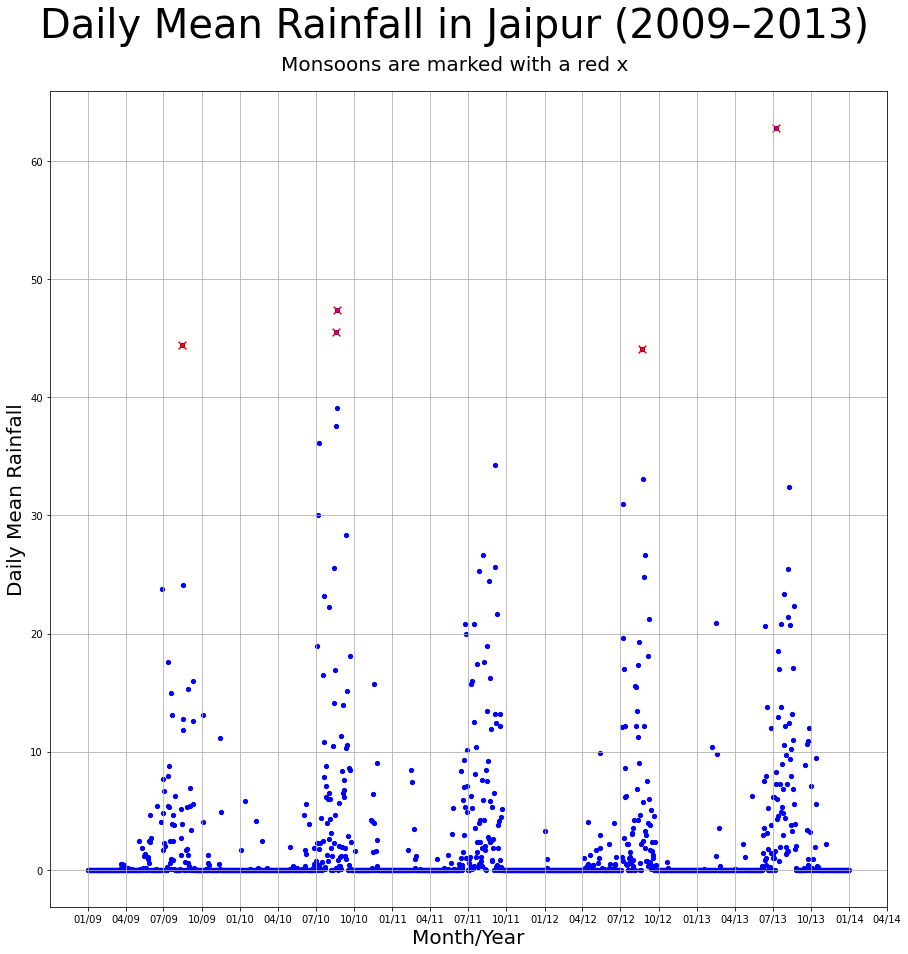

In [20]:
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

# This converter handles errors that occur when using matplotlib.dates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Create scatter plot
sca = fig.add_subplot()

fig, sca = plt.subplots(figsize = (15, 15))

plt.grid(True)

plt.scatter(rain_jaipur['date'], rain_jaipur['mean'], s = 18,
            c = 'blue')

sca.set_xlabel('Month/Year', fontsize = 20)
sca.set_ylabel('Daily Mean Rainfall', fontsize = 20)
plt.figtext(0.5, 0.93, 'Daily Mean Rainfall in Jaipur (2009–2013)', fontsize = 40, ha = 'center')
plt.figtext(0.5, 0.9, 'Monsoons are marked with a red x', fontsize = 20, ha = 'center')

sca.xaxis.set_major_formatter(DateFormatter('%m/%y'))
sca.xaxis.set_major_locator(mdates.MonthLocator(interval = 3))

sca.scatter(rain_jaipur_monsoon['date'], rain_jaipur_monsoon['mean'],
             s = 60, c = 'red', marker = 'x')

sca = plt.gcf()

plt.show()

I have highlighted the points in the topmost sector of the graph as monsoons. All of these heavy rainfall events occur in between months July and October. Therefore I conclude that monsoon season generally starts in July and ends in October.

## 3

In [21]:
# Save scatter plot
sca.savefig('Daily Mean Rainfall in Jaipur.pdf')

## 4
My interpretation of this question: you are asking for a table with years on one end, states on the other, and the average temperatures in the cells. So cell (0, 0) will have the average 2009 temperature in Gujarat.

I also assume that you want me to use the same weighted average formula for linking temperatures and their district centroids.

As before, I will take the average per year per coordinate.

In [22]:
# Yearly mean temperature
temp_yearly = temp.groupby(by = ['year', 'coordinates']).agg({'temperature':'mean'}).reset_index() \
                  .rename(columns = {'temperature':'yearly mean'})
temp_yearly

,year,coordinates,yearly mean
0,2009,"(8.5, 73.5)",28.020192
1,2009,"(8.5, 76.5)",27.106959
2,2009,"(8.5, 77.5)",28.552384
3,2009,"(8.5, 78.5)",28.909068
4,2009,"(9.5, 76.5)",26.895370
...,...,...,...
1766,2013,"(35.5, 79.5)",13.554936
1767,2013,"(36.5, 72.5)",15.338774
1768,2013,"(36.5, 73.5)",14.400839
1769,2013,"(36.5, 74.5)",15.219129


In [23]:
# Generate all distances between district centroids and yearly temperature coordinates
temp_dist_yearly = []
for i in range(len(geo)):
    for j in range(len(temp_yearly)):
        temp_dist_yearly.append(vincenty(geo['centroid'][i], temp_yearly['coordinates'][j]))

# RELAX: This cell only takes a couple seconds to compute. temp_yearly is much smaller than either rain or temp.

In [24]:
temp_dist_yearly

[1585.840219,
 1643.834488,
 1676.398863,
 1715.014386,
 1537.529994,
 1572.155313,
 1613.099879,
 1659.895177,
 1402.018976,
 1431.856968,
 1468.815898,
 1512.372892,
 1561.975005,
 1248.777526,
 1294.863033,
 1326.967299,
 1366.586753,
 1413.088396,
 1465.816191,
 1162.232344,
 1188.324333,
 1223.063888,
 1265.738243,
 1315.574315,
 1371.790452,
 1433.634817,
 1054.025252,
 1082.586884,
 1120.42287,
 1166.630138,
 1220.25678,
 1280.369384,
 1346.097626,
 946.364507,
 977.912862,
 1019.42779,
 1069.748352,
 1127.694908,
 1192.154273,
 1262.127107,
 816.34122,
 839.46326,
 874.686945,
 920.62319,
 975.758813,
 1038.628134,
 1107.913484,
 1182.485513,
 707.236542,
 733.657297,
 773.492653,
 824.799982,
 885.586004,
 954.038761,
 1028.626656,
 1108.109176,
 1191.504713,
 1278.044876,
 598.689527,
 629.503891,
 675.248436,
 733.132245,
 800.52452,
 875.229424,
 955.530978,
 1040.131174,
 1128.060552,
 1218.595797,
 1311.19426,
 474.603699,
 491.076721,
 527.988085,
 581.457186,
 647.39263

In [25]:
# Distribute yearly temperature distance values to their districts
df_temp_dist_yearly = pd.DataFrame(np.array(temp_dist_yearly)\
                            .reshape(int(len(temp_dist_yearly) / 75), -1, order = 'F'), columns = geo['distname_iaa'])

# Set values over 100 to NaN. There are no values equal to exactly 100 so both > and >= will yield the same result.
# You can check this with this code: df_temp_dist_yearly[df_temp_dist_yearly.isin(["100"]).any(axis=1)]
df_temp_dist_yearly[df_temp_dist_yearly > 100] = float('NaN')

df_temp_dist_yearly

# Most output are NaNs, but you can verify that values exist by using df_temp_dist_yearly.sum()

distname_iaa,ahmedabad,amreli,banaskantha,baroda,bhavnagar,broach,dangs,jamnagar,junagadh,kaira,...,jhunjhunu,jodhpur,kota,nagaur,pali,sawai madhopur,sikar,sirohi,tonk,udaipur
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# Apply weighted average formula
yearly_mean_temp = df_temp_dist_yearly.applymap(sqrt).rdiv(temp_yearly['yearly mean'], axis = 'index')

# Reintroduce years
yearly_mean_temp = temp_yearly.merge(yearly_mean_temp, left_index = True, right_index = True)
yearly_mean_temp = yearly_mean_temp.drop(columns = ['coordinates', 'yearly mean'])
yearly_mean_temp

,year,ahmedabad,amreli,banaskantha,baroda,bhavnagar,broach,dangs,jamnagar,junagadh,...,jhunjhunu,jodhpur,kota,nagaur,pali,sawai madhopur,sikar,sirohi,tonk,udaipur
0,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1766,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1767,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1768,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1769,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
print('First index where a state is introduced in geo:')
print(geo['stname_iaa'].drop_duplicates())
print('Number of rows in geo:', len(geo))
print('Number of columns in yearly_mean_temp:', len(yearly_mean_temp.columns))

First index where a state is introduced in geo:
0         gujarat
17         kerala
26    pondicherry
30         punjab
49      rajasthan
Name: stname_iaa, dtype: object
Number of rows in geo: 75
Number of columns in yearly_mean_temp: 76


In [29]:
# Collapse districts into states
# Above I describe which indices I will use to map the district average temperature data to their states
# I have to add one to the geo indices because yearly_mean_temp has the 'year' taking up a column

year_state = pd.DataFrame()
year_state['year'] = yearly_mean_temp['year']

year_state['gujarat'] = yearly_mean_temp.iloc[:, 1:17].sum(axis = 1)
year_state['kerala'] = yearly_mean_temp.iloc[:, 18:26].sum(axis = 1)
year_state['pondicherry'] = yearly_mean_temp.iloc[:, 27:30].sum(axis = 1)
year_state['punjab'] = yearly_mean_temp.iloc[:, 30:49].sum(axis = 1)
year_state['rajasthan'] = yearly_mean_temp.iloc[:, 50:76].sum(axis = 1)

year_state

# year_state by itself doesn't mean anything. Although for most points my "sum" just collapses a single data point 
# into a bunch of NaNs, there will be some points where two weighted temperatures in different districts
# will sum to a larger temperature. This happens when one temperature coordinate covers multiple districts.
# You can check they exist using yearly_mean_temp.dropna(thresh = 2). Ideally, I would keep these points
# separate, forming a new row every time this collision occurs. But for the final dataset it won't matter, as I'm
# going to sum all of the points within each year anyway when I take the mean. 

,year,gujarat,kerala,pondicherry,punjab,rajasthan
0,2009,0.0,0.000000,0.0,0.0,0.0
1,2009,0.0,3.014063,0.0,0.0,0.0
2,2009,0.0,2.974012,0.0,0.0,0.0
3,2009,0.0,0.000000,0.0,0.0,0.0
4,2009,0.0,19.122781,0.0,0.0,0.0
...,...,...,...,...,...,...
1766,2013,0.0,0.000000,0.0,0.0,0.0
1767,2013,0.0,0.000000,0.0,0.0,0.0
1768,2013,0.0,0.000000,0.0,0.0,0.0
1769,2013,0.0,0.000000,0.0,0.0,0.0


In [46]:
# Done
year_state_mean = year_state.groupby(by = 'year').agg('mean').reset_index()
year_state_mean

,year,gujarat,kerala,pondicherry,punjab,rajasthan
0,2009,0.458330,0.185807,0.063218,0.501901,0.712585
1,2010,0.457443,0.186874,0.063298,0.503505,0.710857
2,2011,0.445619,0.183107,0.062200,0.486478,0.684980
3,2012,0.440738,0.185248,0.063160,0.486535,0.678329
4,2013,0.440128,0.184908,0.062958,0.488730,0.678437


In [47]:
# Preparing the dataframe for plugging into matplotlib.pyplot.table
# I had to make 'year' a string because matplotlib converts all integers to floating point
# Converting to string prevents the years showing up as 2009.0, 2010.0, etc
year_state_tab = year_state_mean.round(2)
year_state_tab['year'] = year_state_mean['year'].apply(str)
year_state_tab.dtypes

year            object
gujarat        float64
kerala         float64
pondicherry    float64
punjab         float64
rajasthan      float64
dtype: object

In [48]:
# Create figure
fig2 = plt.figure()

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Average Temperature by State and Year')

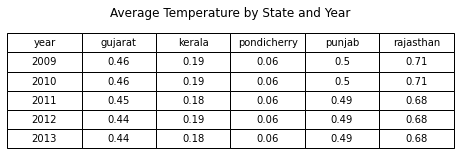

In [49]:
# Create table
tab = fig2.add_subplot()
fig2, tab = plt.subplots(figsize = (8, 2.5))
tab.axis('off')
table = tab.table(cellText = year_state_tab.values, colLabels = year_state_tab.columns,
                     loc = 'center', cellLoc = 'center')
table.scale(1, 1.6)
plt.title('Average Temperature by State and Year')

In [51]:
# Save table as PDF
fig2.savefig('Average Temperature by State and Year.pdf')

# 4: Estimation and Causal Inference

## 1
$mortality = \beta_{0} + \beta_{1} temperature$

## 2
A $\beta_{1}$ coefficient of 0.05 would indicate that a rise of 1 degree Celsius increase in temperature leads to a 0.05 increase in the mortality rate. A standard error of 0.02 indicates that the data closely hugs the line of best fit.

## 3
If temperature becomes too low, mortality will go up. If temperature becomes too high, mortality will go up. There is a middle range where mortality will go down. This indicates we should introduce a squared parameter to account for this. The new model is $mortality = \beta_{0} + \beta_{1} temperature + \beta_{2} temperature^{2}$.

## 4
Adding in control variables to such as fixed effects (age, gender, urban/rural) or random effects (humidity) can help seek and out and mitigate effects from potential confounding variables. By adding control variables to our equation, their effect on $mortality$ will be separated from $temperature$, and therefore the coefficient on the $temperature$ will be more accurate.

## 5
$mortality = \beta_{0} + \beta_{1} temperature + \beta_{2} temperature^{2} + \beta_{3} age + \beta_{4} gender + \beta_{5} urban + \beta_{6} humidity$

In this model, $age$, $gender$, and $urban$ are 0-1 dummy variables.

The standard error will be measured by taking the sum of squared residuals between the line of best fit and the data points.